In [1]:
%cd ..

c:\Projects\Groningen-Waste-Collection


In [2]:
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

## Fill-rate sensor data

This is data from a small pilot of around thirty containers where fill rate sensors have been installed.
Such sensors accurately track the fill rate of each container.
We have around 500 observations of the actual fill rate when the container was emptied.

In [3]:
df = pd.read_excel("data/Data pilot OGC - sensordata.xlsm")
df.head()

,Geleegd op,Containernummer,Ledigingnummer,Capaciteit m³,Volume correctiefactor,Max aantal stortingen,% per klikbeweging,Daadwerkelijk aantal klikbewegingen,Vulgraad obv kliks in %,Daadwerkelijk vol %,Vulgraad per klik in %
0,1-7-2023,695,1,5,1.00,85,1.176471,77.3500,91,48,0.620556
1,1-7-2023,271,2,5,0.95,85,1.238390,112.2425,139,97,0.864200
2,2-7-2023,115,3,4,0.95,70,1.503759,61.8450,93,60,0.970167
3,3-7-2023,890,4,5,0.95,85,1.238390,96.0925,119,81,0.842938
4,5-7-2023,63,5,4,0.95,70,1.503759,60.5150,91,85,1.404610


In [4]:
len(df)

473

We next determine the container's filled volume when being emptied (based on the actual sensor data), and plot a histogram of the average volume per deposit.
By virtue of the CLT, that should be fairly normally distributed, but the mean, min, and max values should hopefully still tell us something about the spread.

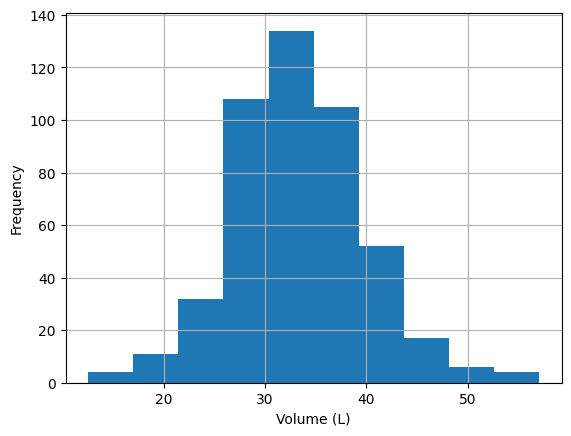

In [5]:
volume = (1000 * df["Capaciteit m³"]) * (df["Daadwerkelijk vol %"] / 100)  # in liters
avg_volume = volume / df["Daadwerkelijk aantal klikbewegingen"]
ax = avg_volume.hist()
ax.set_xlabel("Volume (L)")
ax.set_ylabel("Frequency");

In [6]:
avg_volume.mean()

33.41820047261556

In [7]:
avg_volume.min()

12.549019607843137

In [8]:
avg_volume.max()

57.065741276267595

A histogram of actual number of deposits ("clicks").
This is the primary input the municipality uses to determine when to empty a container.

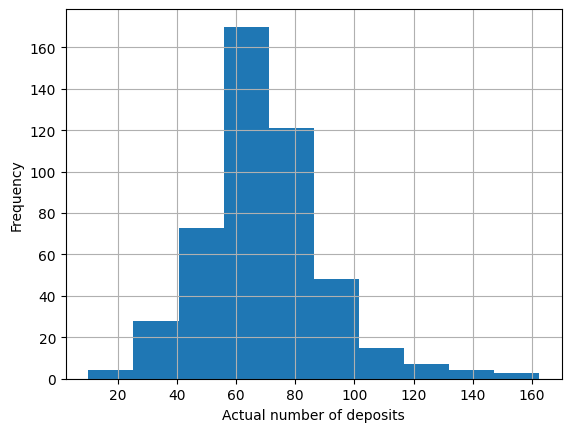

In [9]:
ax = df["Daadwerkelijk aantal klikbewegingen"].hist()
ax.set_xlabel("Actual number of deposits")
ax.set_ylabel("Frequency");

In the next plot we investigate the difference between how full the municipality thinks the containers are ("Vulgraad obv kliks in %") and how full they are according to the sensor data ("Daadwerkelijk vol %").
It is clear from this figure that the municipality's method is far too conservative: it almost always overestimates the actual fill rate.

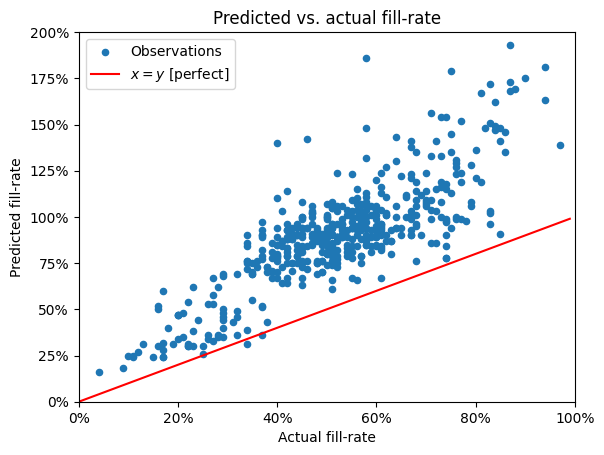

In [10]:
ax = df.plot.scatter(
    x="Daadwerkelijk vol %",
    y="Vulgraad obv kliks in %",
    label="Observations",
)
ax.plot(
    np.arange(0, 100),
    np.arange(0, 100),
    color="red",
    label="$x = y$ [perfect]",
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

ax.legend()
ax.set_xlim([0, 100])
ax.set_ylim([0, 200])
ax.set_title("Predicted vs. actual fill-rate")
ax.set_xlabel("Actual fill-rate")
ax.set_ylabel("Predicted fill-rate");